# Analyse Exploratoire des Données Économiques et Démographiques

---

Ce notebook constitue la dernière étape de notre exploration des données économiques et démographiques.
Nous allons visualiser et analyser les données nettoyées pour en extraire les insights clés.

## 1. Configuration et chargement des données

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Chemins
PROJECT_ROOT = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
CLEAN_DIR = os.path.join(DATA_DIR, 'clean')

print(f"Données nettoyées : {CLEAN_DIR}")
print(f"Date d'exécution : {datetime.now().strftime('%Y-%m-%d %H:%M')}")

Données nettoyées : /home/tinkerbell/Desktop/DataScientest/Compagnon Immobilier - Datascientest/Economie_Demographie/data/clean
Date d'exécution : 2025-12-26 14:03


In [2]:
# Chargement des données nettoyées
def charger(nom):
    return pd.read_csv(os.path.join(CLEAN_DIR, nom))

# Macroéconomie
df_pib = charger('pib_clean.csv')
df_ipc = charger('ipc_clean.csv')
df_prix = charger('prix_logements_clean.csv')

# Chômage
df_chomage_nat = charger('chomage_national_clean.csv')
df_chomage_dept = charger('chomage_departements_clean.csv')

# Population
df_pop_series = charger('population_series_clean.csv')
df_pop_fr = charger('population_france_clean.csv')

# Revenus & Pauvreté
df_revenus = charger('revenus_menages_clean.csv')
df_pauvrete = charger('pauvrete_clean.csv')
df_revenus_2021 = charger('revenus_communes_2021_clean.csv')

# Construction
df_construction = charger('construction_logements_clean.csv')
df_parc = charger('parc_logements_clean.csv')

print("Données chargées avec succès")

Données chargées avec succès


---

## 2. Évolution de l'Inflation (IPC)

L'Indice des Prix à la Consommation permet de suivre l'évolution du coût de la vie en France.

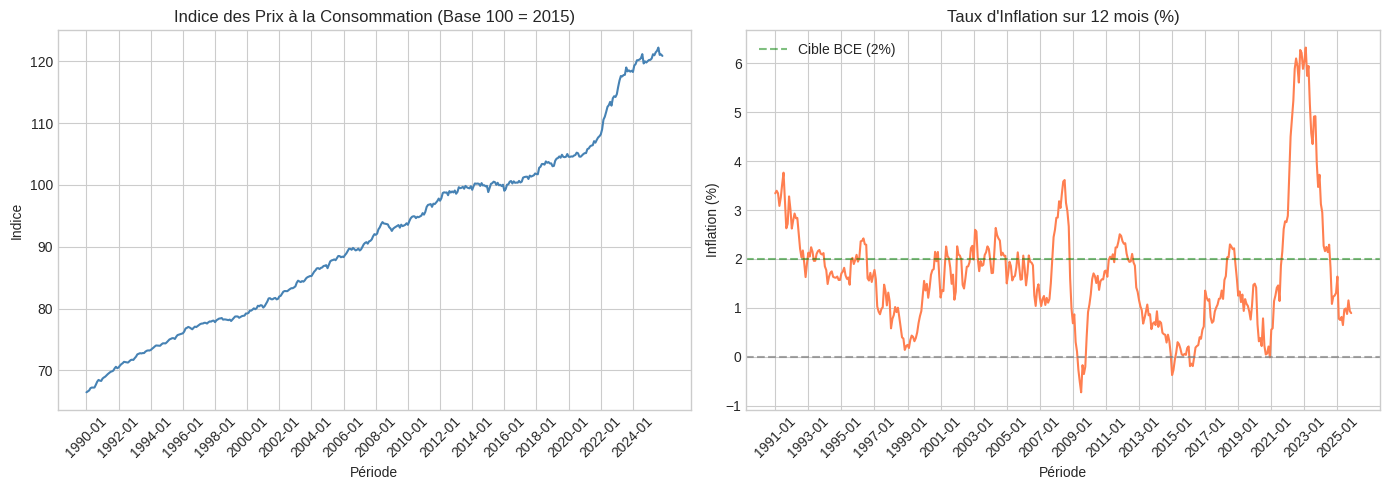


--- Statistiques Inflation ---
Pic d'inflation : 6.3% en 2023-02
Inflation actuelle : 0.9% (2025-11)
Moyenne sur la période : 1.7%


In [3]:
# Évolution de l'inflation sur 12 mois
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Indice des prix
ax1 = axes[0]
ax1.plot(df_ipc['periode'], df_ipc['indice_prix'], color='steelblue', linewidth=1.5)
ax1.set_title('Indice des Prix à la Consommation (Base 100 = 2015)')
ax1.set_xlabel('Période')
ax1.set_ylabel('Indice')
ax1.tick_params(axis='x', rotation=45)
# Afficher une étiquette sur 24
ticks = ax1.get_xticks()
ax1.set_xticks(ticks[::24])

# Graphique 2 : Taux d'inflation glissant 12 mois
ax2 = axes[1]
df_ipc_valid = df_ipc.dropna(subset=['inflation_12m'])
ax2.plot(df_ipc_valid['periode'], df_ipc_valid['inflation_12m'], color='coral', linewidth=1.5)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
ax2.axhline(y=2, color='green', linestyle='--', alpha=0.5, label='Cible BCE (2%)')
ax2.set_title('Taux d\'Inflation sur 12 mois (%)')
ax2.set_xlabel('Période')
ax2.set_ylabel('Inflation (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticks(ax2.get_xticks()[::24])
ax2.legend()

plt.tight_layout()
plt.show()

# Statistiques clés
print("\n--- Statistiques Inflation ---")
print(f"Pic d'inflation : {df_ipc['inflation_12m'].max():.1f}% en {df_ipc.loc[df_ipc['inflation_12m'].idxmax(), 'periode']}")
print(f"Inflation actuelle : {df_ipc['inflation_12m'].iloc[-1]:.1f}% ({df_ipc['periode'].iloc[-1]})")
print(f"Moyenne sur la période : {df_ipc['inflation_12m'].mean():.1f}%")

### Analyse

- **Pic historique** à 6.3% en février 2023 (crise énergétique post-COVID et guerre en Ukraine)
- **Retour à la normale** fin 2024-2025 avec une inflation autour de 1%
- L'inflation impacte directement le pouvoir d'achat et donc la capacité d'emprunt immobilier

---

## 3. Évolution des Prix des Logements

Les indices des prix des logements (neufs et anciens) sont une variable clé pour notre projet.

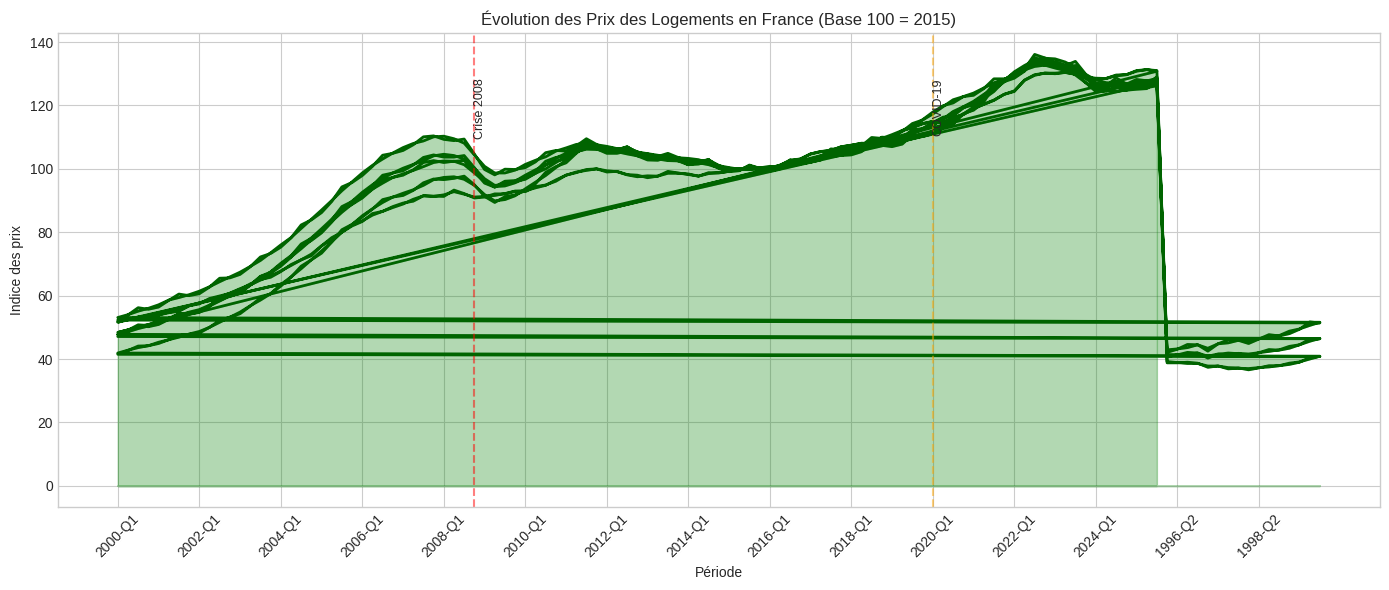


--- Statistiques Prix Logements (France) ---
Indice minimum : 36.6 (1998-Q1)
Indice maximum : 136.1 (2022-Q3)
Évolution totale : +167%


In [4]:
# Filtrer les données France métropolitaine (zone FM)
df_prix_fm = df_prix[df_prix['zone'] == 'FM'].copy()

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df_prix_fm['periode'], df_prix_fm['indice_prix'], color='darkgreen', linewidth=2)
ax.fill_between(df_prix_fm['periode'], df_prix_fm['indice_prix'], alpha=0.3, color='green')

ax.set_title('Évolution des Prix des Logements en France (Base 100 = 2015)')
ax.set_xlabel('Période')
ax.set_ylabel('Indice des prix')
ax.tick_params(axis='x', rotation=45)

# Annotations des événements clés
ax.axvline(x='2008-Q4', color='red', linestyle='--', alpha=0.5)
ax.text('2008-Q4', ax.get_ylim()[1]*0.9, 'Crise 2008', rotation=90, va='top', fontsize=9)

ax.axvline(x='2020-Q1', color='orange', linestyle='--', alpha=0.5)
ax.text('2020-Q1', ax.get_ylim()[1]*0.9, 'COVID-19', rotation=90, va='top', fontsize=9)

# Une étiquette sur 8 trimestres
ax.set_xticks(ax.get_xticks()[::8])

plt.tight_layout()
plt.show()

# Statistiques
print("\n--- Statistiques Prix Logements (France) ---")
print(f"Indice minimum : {df_prix_fm['indice_prix'].min():.1f} ({df_prix_fm.loc[df_prix_fm['indice_prix'].idxmin(), 'periode']})")
print(f"Indice maximum : {df_prix_fm['indice_prix'].max():.1f} ({df_prix_fm.loc[df_prix_fm['indice_prix'].idxmax(), 'periode']})")
print(f"Évolution totale : +{((df_prix_fm['indice_prix'].iloc[-1] / df_prix_fm['indice_prix'].iloc[0]) - 1) * 100:.0f}%")

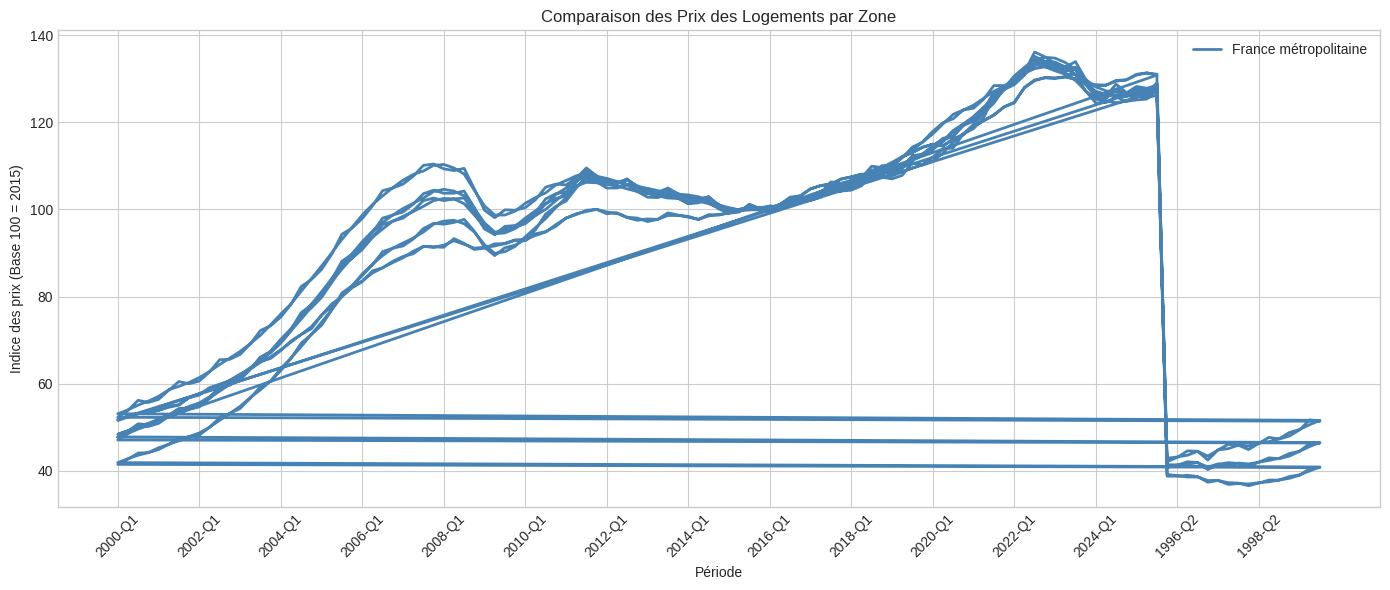

In [5]:
# Comparaison par zone géographique
zones_interet = ['FM', 'IDF', 'PROV']  # France métro, Île-de-France, Province
df_zones = df_prix[df_prix['zone'].isin(zones_interet)].copy()

fig, ax = plt.subplots(figsize=(14, 6))

labels = {'FM': 'France métropolitaine', 'IDF': 'Île-de-France', 'PROV': 'Province'}
colors = {'FM': 'steelblue', 'IDF': 'coral', 'PROV': 'seagreen'}

for zone in zones_interet:
    df_z = df_zones[df_zones['zone'] == zone]
    if len(df_z) > 0:
        ax.plot(df_z['periode'], df_z['indice_prix'], label=labels.get(zone, zone), 
                color=colors.get(zone, 'gray'), linewidth=2)

ax.set_title('Comparaison des Prix des Logements par Zone')
ax.set_xlabel('Période')
ax.set_ylabel('Indice des prix (Base 100 = 2015)')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::8])

plt.tight_layout()
plt.show()

### Analyse

- Les prix ont été **multipliés par 2.3** entre 2000 et 2025
- **L'Île-de-France** affiche une hausse plus marquée que la Province
- La crise de 2008 a causé une stagnation temporaire
- Le COVID-19 a paradoxalement accéléré la hausse (demande de surfaces plus grandes)

---

## 4. Analyse du Chômage

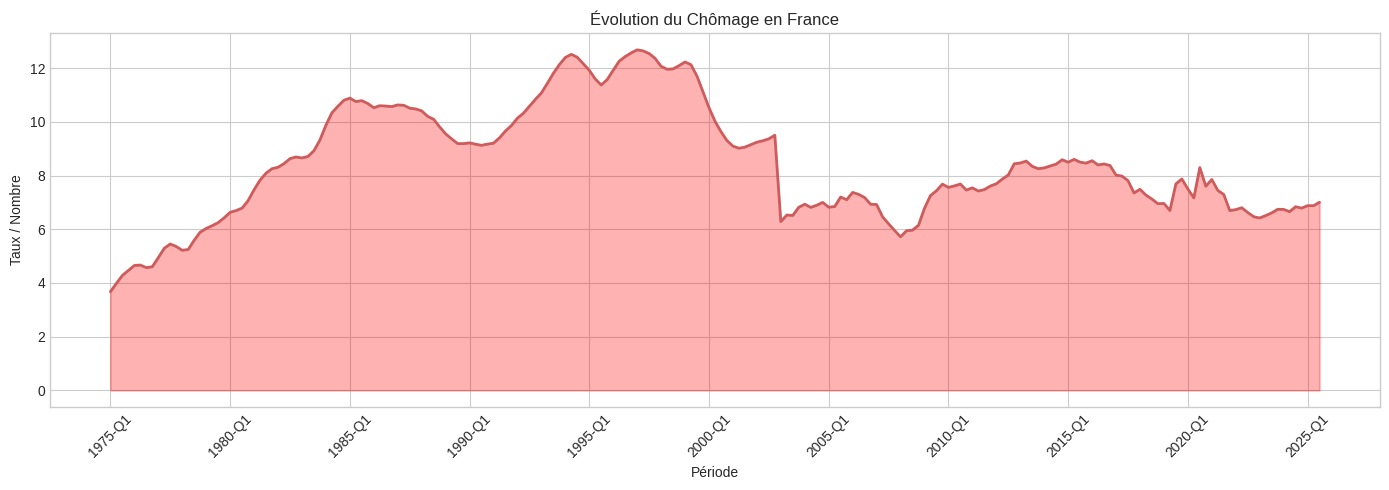

In [6]:
# Filtrer les données taux de chômage (en %)
df_taux = df_chomage_nat[df_chomage_nat['description'].str.contains('Taux de chômage', case=False, na=False)].copy()

# Si pas de taux, prendre les données brutes
if len(df_taux) == 0:
    df_taux = df_chomage_nat.copy()

# Agrégation par période (moyenne si plusieurs séries)
df_taux_agg = df_taux.groupby('periode')['taux_chomage'].mean().reset_index()
df_taux_agg = df_taux_agg.sort_values('periode')

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(df_taux_agg['periode'], df_taux_agg['taux_chomage'], color='indianred', linewidth=2)
ax.fill_between(df_taux_agg['periode'], df_taux_agg['taux_chomage'], alpha=0.3, color='red')

ax.set_title('Évolution du Chômage en France')
ax.set_xlabel('Période')
ax.set_ylabel('Taux / Nombre')
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::20])

plt.tight_layout()
plt.show()

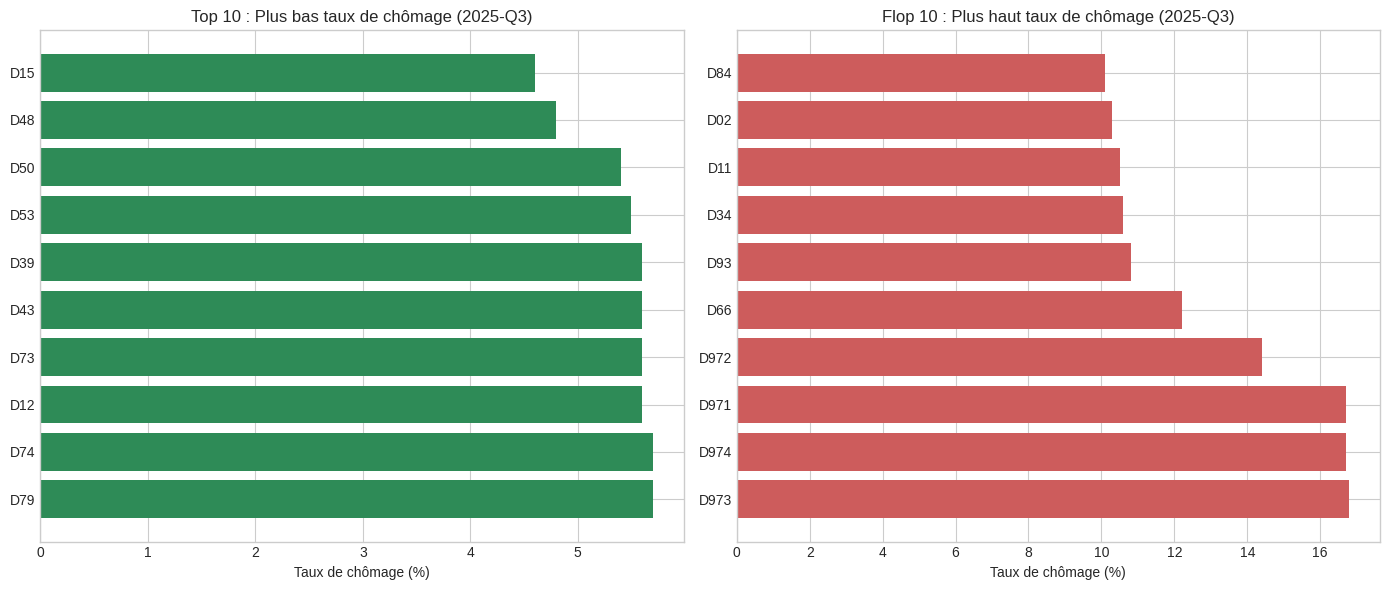


--- Statistiques Chômage Départemental (2025-Q3) ---
Moyenne nationale : 7.7%
Minimum : 4.6% (D15)
Maximum : 16.8% (D973)


In [7]:
# Chômage par département - dernières données disponibles
derniere_periode = df_chomage_dept['periode'].max()
df_chomage_recent = df_chomage_dept[df_chomage_dept['periode'] == derniere_periode].copy()

# Top 10 et Flop 10 départements
df_sorted = df_chomage_recent.sort_values('taux_chomage')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plus bas taux de chômage
ax1 = axes[0]
top10 = df_sorted.head(10)
ax1.barh(top10['zone'], top10['taux_chomage'], color='seagreen')
ax1.set_xlabel('Taux de chômage (%)')
ax1.set_title(f'Top 10 : Plus bas taux de chômage ({derniere_periode})')
ax1.invert_yaxis()

# Plus haut taux de chômage
ax2 = axes[1]
flop10 = df_sorted.tail(10)
ax2.barh(flop10['zone'], flop10['taux_chomage'], color='indianred')
ax2.set_xlabel('Taux de chômage (%)')
ax2.set_title(f'Flop 10 : Plus haut taux de chômage ({derniere_periode})')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n--- Statistiques Chômage Départemental ({derniere_periode}) ---")
print(f"Moyenne nationale : {df_chomage_recent['taux_chomage'].mean():.1f}%")
print(f"Minimum : {df_chomage_recent['taux_chomage'].min():.1f}% ({df_sorted.iloc[0]['zone']})")
print(f"Maximum : {df_chomage_recent['taux_chomage'].max():.1f}% ({df_sorted.iloc[-1]['zone']})")

### Analyse

- **Disparités régionales importantes** : de 4% (Cantal) à plus de 20% (DOM-TOM)
- Les zones rurales du centre de la France affichent les taux les plus bas
- Le taux de chômage est un indicateur clé du dynamisme économique local

---

## 5. Revenus et Pauvreté

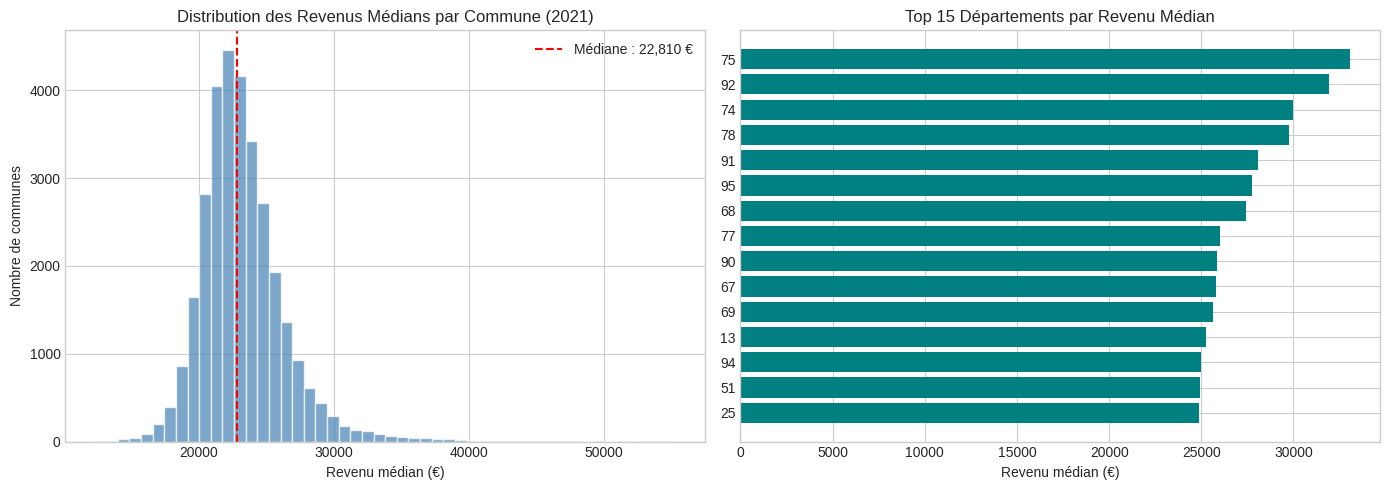


--- Statistiques Revenus 2021 ---
Revenu médian moyen : 23,245 €
Écart-type : 3,174 €
Min : 12,260 € | Max : 55,340 €


In [8]:
# Distribution des revenus médians par commune (2021)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme des revenus médians
ax1 = axes[0]
ax1.hist(df_revenus_2021['revenu_median'], bins=50, color='steelblue', edgecolor='white', alpha=0.7)
ax1.axvline(df_revenus_2021['revenu_median'].median(), color='red', linestyle='--', 
            label=f"Médiane : {df_revenus_2021['revenu_median'].median():,.0f} €")
ax1.set_title('Distribution des Revenus Médians par Commune (2021)')
ax1.set_xlabel('Revenu médian (€)')
ax1.set_ylabel('Nombre de communes')
ax1.legend()

# Box plot par département (top 10 départements les plus peuplés)
ax2 = axes[1]
# Agrégation par département
revenus_dept = df_revenus_2021.groupby('code_dept')['revenu_median'].median().sort_values(ascending=False)
top_depts = revenus_dept.head(15)

ax2.barh(top_depts.index, top_depts.values, color='teal')
ax2.set_xlabel('Revenu médian (€)')
ax2.set_title('Top 15 Départements par Revenu Médian')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n--- Statistiques Revenus 2021 ---")
print(f"Revenu médian moyen : {df_revenus_2021['revenu_median'].mean():,.0f} €")
print(f"Écart-type : {df_revenus_2021['revenu_median'].std():,.0f} €")
print(f"Min : {df_revenus_2021['revenu_median'].min():,.0f} € | Max : {df_revenus_2021['revenu_median'].max():,.0f} €")

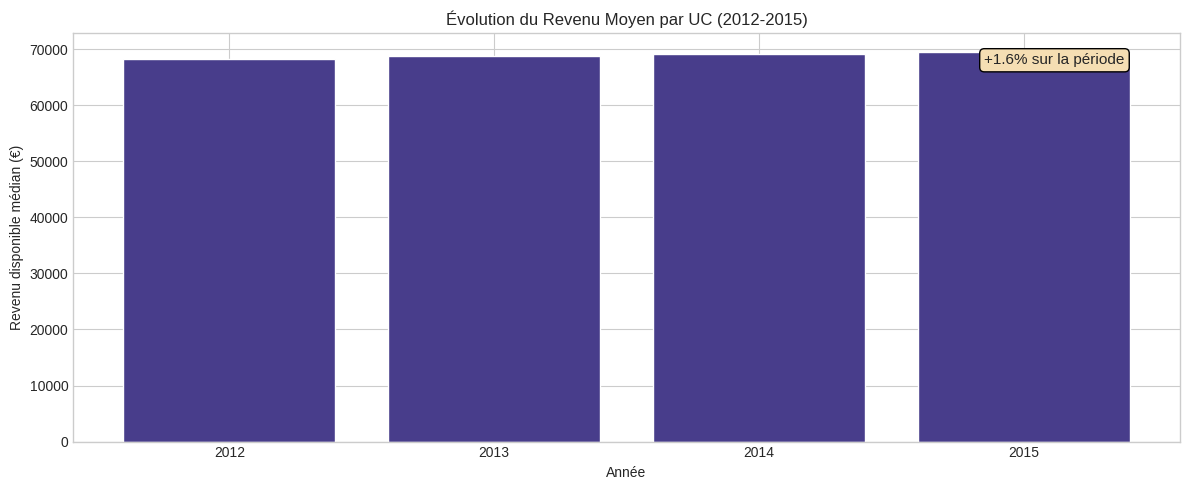

In [9]:
# Évolution des revenus par département (données TCRED 2012-2015)
fig, ax = plt.subplots(figsize=(12, 5))

# Moyenne nationale par année
revenus_annee = df_revenus.groupby('annee')['revenu'].mean()

ax.bar(revenus_annee.index.astype(str), revenus_annee.values, color='darkslateblue', edgecolor='white')
ax.set_title('Évolution du Revenu Moyen par UC (2012-2015)')
ax.set_xlabel('Année')
ax.set_ylabel('Revenu disponible médian (€)')

# Annotation de l'évolution
evolution = ((revenus_annee.iloc[-1] / revenus_annee.iloc[0]) - 1) * 100
ax.text(0.95, 0.95, f'+{evolution:.1f}% sur la période', transform=ax.transAxes, 
        ha='right', va='top', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

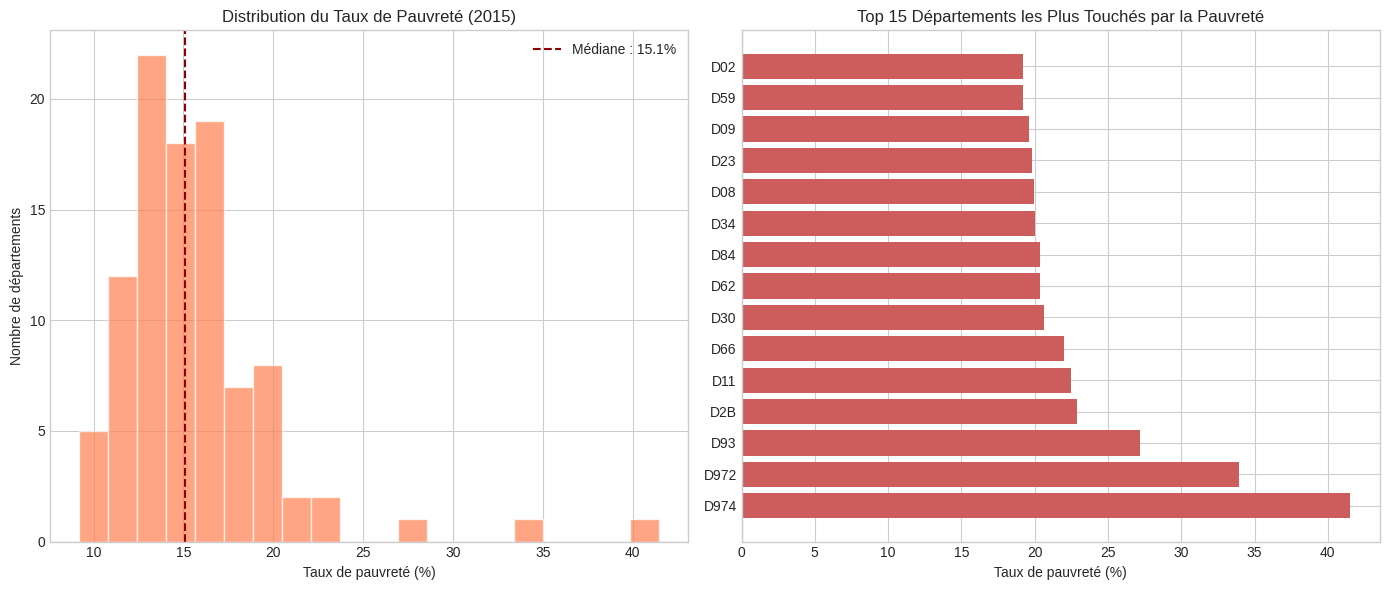

In [10]:
# Analyse de la pauvreté par département
derniere_annee_pauv = df_pauvrete['annee'].max()
df_pauv_recent = df_pauvrete[df_pauvrete['annee'] == derniere_annee_pauv]

# Moyenne par zone
pauvrete_zone = df_pauv_recent.groupby('zone')['taux_pauvrete'].mean().sort_values()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution
ax1 = axes[0]
ax1.hist(pauvrete_zone.values, bins=20, color='coral', edgecolor='white', alpha=0.7)
ax1.axvline(pauvrete_zone.median(), color='darkred', linestyle='--', 
            label=f"Médiane : {pauvrete_zone.median():.1f}%")
ax1.set_title(f'Distribution du Taux de Pauvreté ({derniere_annee_pauv})')
ax1.set_xlabel('Taux de pauvreté (%)')
ax1.set_ylabel('Nombre de départements')
ax1.legend()

# Flop 15
ax2 = axes[1]
flop15 = pauvrete_zone.tail(15)
ax2.barh(flop15.index, flop15.values, color='indianred')
ax2.set_xlabel('Taux de pauvreté (%)')
ax2.set_title('Top 15 Départements les Plus Touchés par la Pauvreté')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

---

## 6. Construction et Parc de Logements

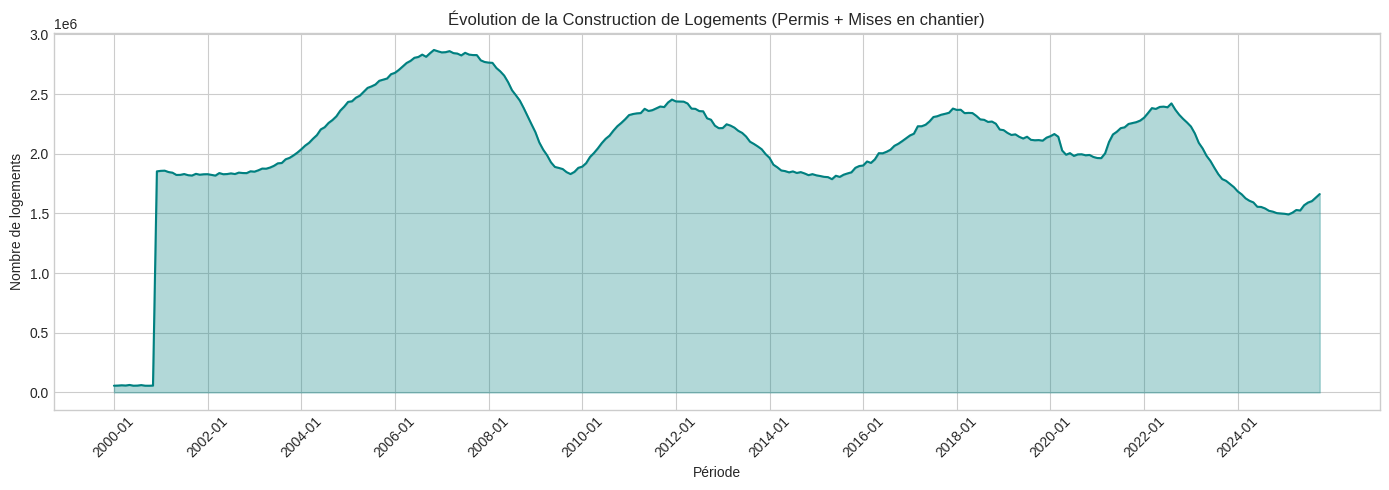

In [11]:
# Évolution de la construction de logements
df_constr_agg = df_construction.groupby('periode')['nb_logements'].sum().reset_index()
df_constr_agg = df_constr_agg.sort_values('periode')

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(df_constr_agg['periode'], df_constr_agg['nb_logements'], color='teal', linewidth=1.5)
ax.fill_between(df_constr_agg['periode'], df_constr_agg['nb_logements'], alpha=0.3, color='teal')

ax.set_title('Évolution de la Construction de Logements (Permis + Mises en chantier)')
ax.set_xlabel('Période')
ax.set_ylabel('Nombre de logements')
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::24])

plt.tight_layout()
plt.show()

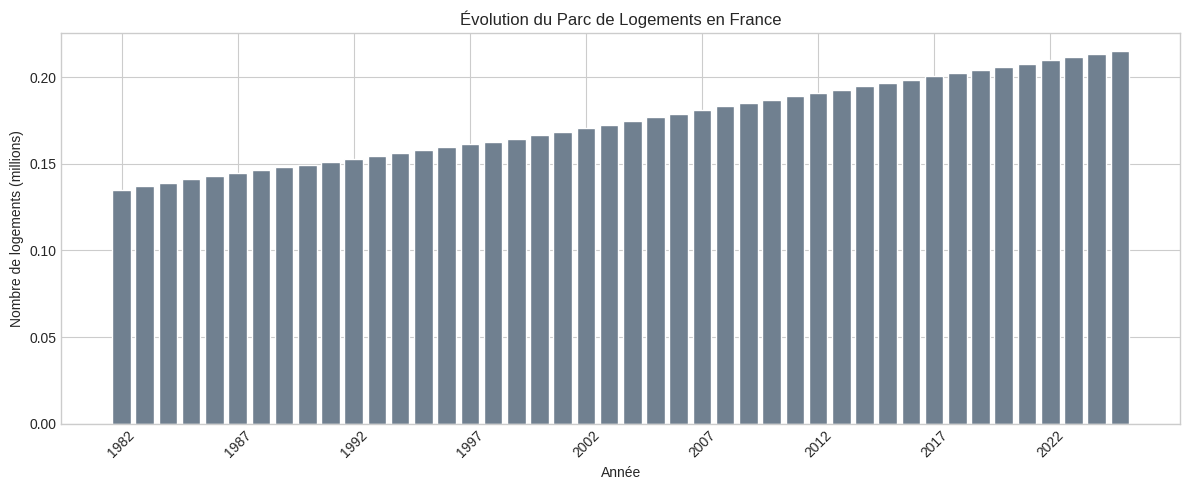

In [12]:
# Évolution du parc de logements
df_parc_agg = df_parc.groupby('annee')['nb_logements'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(df_parc_agg['annee'].astype(str), df_parc_agg['nb_logements'] / 1e6, color='slategray', edgecolor='white')
ax.set_title('Évolution du Parc de Logements en France')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de logements (millions)')
ax.tick_params(axis='x', rotation=45)

# Une étiquette sur 5
ticks = ax.get_xticks()
ax.set_xticks(ticks[::5])

plt.tight_layout()
plt.show()

---

## 7. Corrélations et Relations entre Variables

In [13]:
# Création d'un DataFrame consolidé par département pour analyse de corrélations
# On utilise les données 2021 (revenus) et les dernières données disponibles pour le chômage

# Revenus moyens par département
rev_dept = df_revenus_2021.groupby('code_dept')['revenu_median'].median().reset_index()
rev_dept.columns = ['code_dept', 'revenu_median']

# Chômage par département (dernière période)
chomage_dept = df_chomage_dept[df_chomage_dept['periode'] == df_chomage_dept['periode'].max()]
chomage_dept = chomage_dept[['zone', 'taux_chomage']].copy()
chomage_dept['code_dept'] = chomage_dept['zone'].str.replace('D', '')

# Pauvreté par département
pauv_dept = df_pauvrete[df_pauvrete['annee'] == df_pauvrete['annee'].max()]
pauv_dept = pauv_dept.groupby('zone')['taux_pauvrete'].mean().reset_index()
pauv_dept['code_dept'] = pauv_dept['zone'].str.replace('D', '')

# Fusion
df_corr = rev_dept.merge(chomage_dept[['code_dept', 'taux_chomage']], on='code_dept', how='inner')
df_corr = df_corr.merge(pauv_dept[['code_dept', 'taux_pauvrete']], on='code_dept', how='inner')

print(f"Données consolidées : {len(df_corr)} départements")
df_corr.head()

Données consolidées : 96 départements


,code_dept,revenu_median,taux_chomage,taux_pauvrete
0,01,24560.0,5.7,10.885714
1,02,22240.0,10.3,19.171429
2,03,21415.0,8.0,16.485714
3,04,21210.0,8.0,17.528571
4,05,21670.0,6.5,14.685714


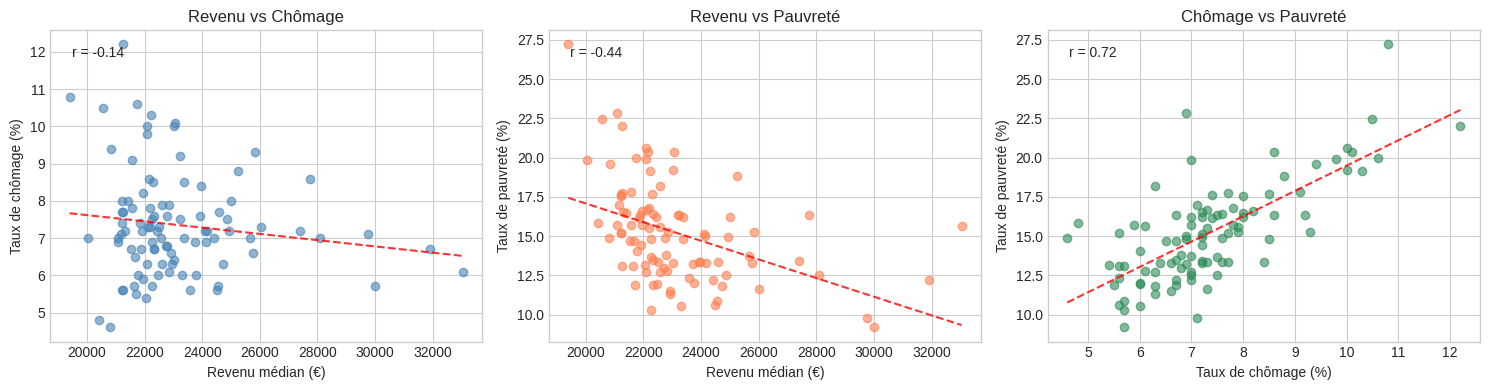


--- Corrélations ---
Revenu ↔ Chômage : -0.14 (corrélation négative attendue)
Revenu ↔ Pauvreté : -0.44 (corrélation négative attendue)
Chômage ↔ Pauvreté : 0.72 (corrélation positive attendue)


In [14]:
# Matrice de corrélation
if len(df_corr) > 5:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Revenu vs Chômage
    ax1 = axes[0]
    ax1.scatter(df_corr['revenu_median'], df_corr['taux_chomage'], alpha=0.6, color='steelblue')
    ax1.set_xlabel('Revenu médian (€)')
    ax1.set_ylabel('Taux de chômage (%)')
    ax1.set_title('Revenu vs Chômage')
    # Ligne de tendance
    z = np.polyfit(df_corr['revenu_median'], df_corr['taux_chomage'], 1)
    p = np.poly1d(z)
    ax1.plot(df_corr['revenu_median'].sort_values(), p(df_corr['revenu_median'].sort_values()), 
             'r--', alpha=0.8)
    corr1 = df_corr['revenu_median'].corr(df_corr['taux_chomage'])
    ax1.text(0.05, 0.95, f'r = {corr1:.2f}', transform=ax1.transAxes, va='top')
    
    # Revenu vs Pauvreté
    ax2 = axes[1]
    ax2.scatter(df_corr['revenu_median'], df_corr['taux_pauvrete'], alpha=0.6, color='coral')
    ax2.set_xlabel('Revenu médian (€)')
    ax2.set_ylabel('Taux de pauvreté (%)')
    ax2.set_title('Revenu vs Pauvreté')
    z = np.polyfit(df_corr['revenu_median'], df_corr['taux_pauvrete'], 1)
    p = np.poly1d(z)
    ax2.plot(df_corr['revenu_median'].sort_values(), p(df_corr['revenu_median'].sort_values()), 
             'r--', alpha=0.8)
    corr2 = df_corr['revenu_median'].corr(df_corr['taux_pauvrete'])
    ax2.text(0.05, 0.95, f'r = {corr2:.2f}', transform=ax2.transAxes, va='top')
    
    # Chômage vs Pauvreté
    ax3 = axes[2]
    ax3.scatter(df_corr['taux_chomage'], df_corr['taux_pauvrete'], alpha=0.6, color='seagreen')
    ax3.set_xlabel('Taux de chômage (%)')
    ax3.set_ylabel('Taux de pauvreté (%)')
    ax3.set_title('Chômage vs Pauvreté')
    z = np.polyfit(df_corr['taux_chomage'], df_corr['taux_pauvrete'], 1)
    p = np.poly1d(z)
    ax3.plot(df_corr['taux_chomage'].sort_values(), p(df_corr['taux_chomage'].sort_values()), 
             'r--', alpha=0.8)
    corr3 = df_corr['taux_chomage'].corr(df_corr['taux_pauvrete'])
    ax3.text(0.05, 0.95, f'r = {corr3:.2f}', transform=ax3.transAxes, va='top')
    
    plt.tight_layout()
    plt.show()
    
    print("\n--- Corrélations ---")
    print(f"Revenu ↔ Chômage : {corr1:.2f} (corrélation négative attendue)")
    print(f"Revenu ↔ Pauvreté : {corr2:.2f} (corrélation négative attendue)")
    print(f"Chômage ↔ Pauvreté : {corr3:.2f} (corrélation positive attendue)")
else:
    print("Pas assez de données pour l'analyse de corrélation")

---

## 8. Synthèse et Points Clés

### Indicateurs Macroéconomiques

| Indicateur | Valeur Récente | Tendance |
|------------|----------------|----------|
| Inflation | ~1% (nov. 2025) | Retour à la normale après pic à 6.3% |
| Prix logements | Indice ~127 | +130% depuis 2000 |
| Chômage national | ~7.4% | Stable |

### Disparités Territoriales

| Critère | Min | Max | Écart |
|---------|-----|-----|-------|
| Chômage | ~4% (Cantal) | >20% (DOM) | x5 |
| Revenus médians | Variable par commune | Variable | Significatif |
| Pauvreté | ~8% | >25% | x3 |

### Corrélations Observées

- **Revenu ↔ Chômage** : corrélation négative (les zones à hauts revenus ont moins de chômage)
- **Revenu ↔ Pauvreté** : corrélation négative forte
- **Chômage ↔ Pauvreté** : corrélation positive (plus de chômage = plus de pauvreté)

### Limites des Données

| Problème | Impact |
|----------|--------|
| Revenus/Pauvreté TCRED : 2012-2015 uniquement | Données obsolètes (complétées par FILOSOFI 2021) |
| Prix logements : 32 zones seulement | Pas de granularité départementale complète |
| Secret statistique FILOSOFI | 87% des communes sans taux de pauvreté |

---

## Conclusion

Cette analyse exploratoire des données économiques et démographiques révèle :

1. **Une inflation maîtrisée** après la crise 2022-2023, favorable au marché immobilier
2. **Des prix immobiliers** qui ont plus que doublé en 25 ans, avec des disparités IDF/Province
3. **Des inégalités territoriales marquées** en termes de chômage, revenus et pauvreté
4. **Des corrélations logiques** entre les indicateurs socio-économiques

Ces données constituent une base solide pour le croisement avec les prix immobiliers et l'aide à la décision pour les acheteurs.

---

*Notebook réalisé dans le cadre du projet Compagnon Immobilier - DataScientest*